In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
traindata_raw = pd.read_csv('au_train.csv')
testdata_raw = pd.read_csv('au_test.csv')
traindata_raw=traindata_raw.rename(columns={"class":"income"})
testdata_raw=testdata_raw.rename(columns={"class":"income"})
traindata=traindata_raw.dropna(axis=0)
testdata=testdata_raw.dropna(axis=0)

In [2]:
traindata.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [3]:
traindata.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
columname = traindata.columns
traindata=np.array(traindata)
testdata=np.array(testdata)

for i in range(1,np.shape(traindata)[1]):
     traindata = traindata[traindata[:,i]!=' ?']
traindata=pd.DataFrame(traindata)
traindata.columns=columname

for i in range(1,np.shape(testdata)[1]):
     testdata = testdata[testdata[:,i]!=' ?']
testdata=pd.DataFrame(testdata)
testdata.columns=columname
traindata = traindata.infer_objects()
testdata=testdata.infer_objects()

In [5]:
traindata_obj=traindata.select_dtypes(include=['object']);traindata_obj.describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30162,30162,30162,30162,30162,30162,30162,30162,30162
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22286,9840,14065,4038,12463,25933,20380,27504,22654


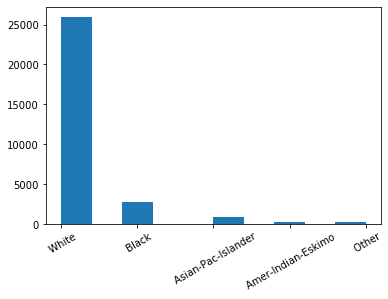

In [6]:
plt.hist(traindata.race);plt.xticks(rotation=30);

count        30162
unique           7
top        Private
freq         22286
Name: workclass, dtype: object

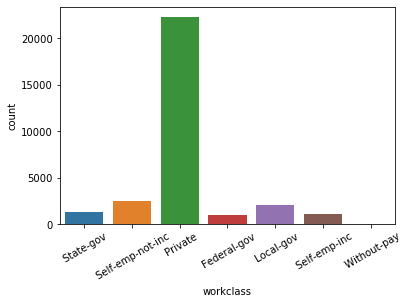

In [7]:
sn.countplot(traindata.workclass);plt.xticks(rotation=30);traindata['workclass'].describe()

count              30162
unique                41
top        United-States
freq               27504
Name: native-country, dtype: object

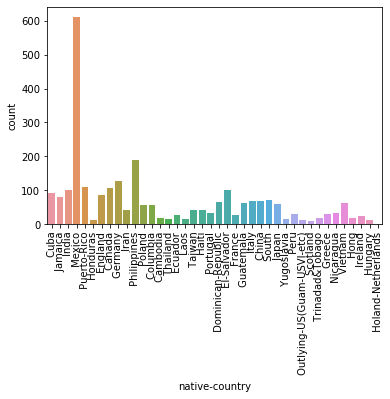

In [8]:
for i in range(1,np.shape(traindata)[1]):
     traindata1 = traindata[traindata['native-country'][:]!=' United-States']
sn.countplot(traindata1['native-country']);plt.xticks(rotation=90);traindata['native-country'].describe()

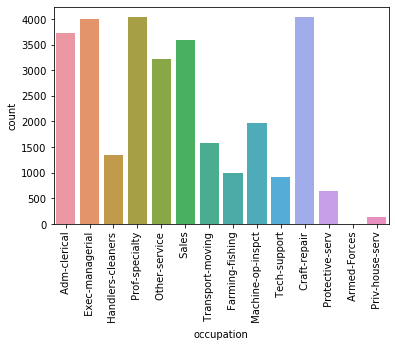

In [9]:
sn.countplot(traindata['occupation']);plt.xticks(rotation=90);

### some feature observations
 - cleaning up and removing rows with Nan and garbage values removes about 1400 rows ~5% of the training data. We can live with that much and no need to be clever and try to fill in those gaps instead. even after removing those rows completely we'll be left with 95% of it. 
 - out of 41 unique native countries, US occurs 27504 times, Mexico is distant second at ~600. So as a part of Feature engineering I'll treat Rest of world as 0 and US as 1
 - Similarly for workclass Private : 1 , Others : 0
 - For race : I'll manually use One Hot encoder technique on White, Black and Others
 - will create a new feature - Capital Net defined as _{Capital Gain - Capital Loss}_
 - I'll study both cases : education can be treated numerically and has incremental effect on income ; other case it doesn't necessarily and let it be determined by target encoder.

In [10]:
traindata = traindata.infer_objects()
testdata=testdata.infer_objects()
testdata['capital-net']=testdata['capital-gain']-testdata['capital-loss']
traindata['capital-net']=traindata['capital-gain']-traindata['capital-loss']
testdata['income'].replace({" <=50K.": 0, " >50K.": 1}, inplace=True)
traindata['income'].replace({" <=50K": 0, " >50K": 1}, inplace=True)
testdata['sex'] = np.where(testdata.sex == ' Male',1,0)
traindata['sex'] = np.where(traindata.sex == ' Male',1,0)
testdata['native-country'] = np.where(testdata['native-country'] == ' United-States',1,0)
traindata['native-country'] = np.where(traindata['native-country'] == ' United-States',1,0)
testdata['workclass'] = np.where(testdata.workclass == ' Private',1,0)
traindata['workclass'] = np.where(traindata.workclass == ' Private',1,0)
testdata['race_other'] = np.where((testdata.race != ' Black')&(testdata.race != ' White'),1,0)
testdata['race_black'] = np.where(testdata.race == ' Black',1,0)
testdata['race_white'] = np.where(testdata.race == ' White',1,0)
traindata['race_other'] = np.where((traindata.race != ' Black')&(traindata.race != ' White'),1,0)
traindata['race_black'] = np.where(traindata.race == ' Black',1,0)
traindata['race_white'] = np.where(traindata.race == ' White',1,0)

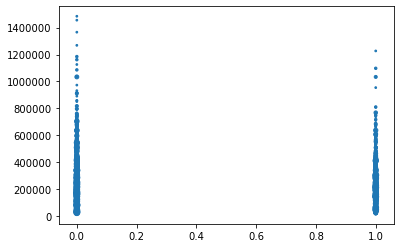

In [11]:
plt.scatter(traindata.income,traindata.fnlwgt,s=traindata['fnlwgt'].value_counts()*3)

#### people with high fnlwgt tend to make less than 50k/year

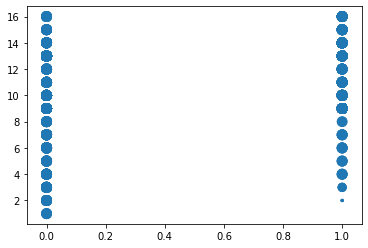

In [12]:
plt.scatter(traindata.income,traindata['education-num'],s=(traindata['education-num'].value_counts())/100)

#### people with extremely low education-num (i.e. education qualification) tend to make less than 50k/year. but apart from that doesn't seem to make much difference.

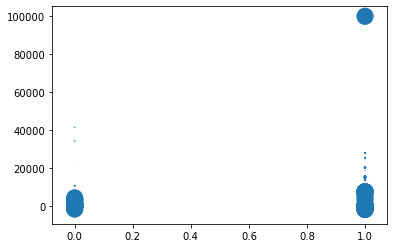

In [13]:
plt.scatter(traindata.income,traindata['capital-net'],s=(traindata['capital-net'].value_counts())/100)

#### people with high capital-net have pulled themselves into >50k/year category

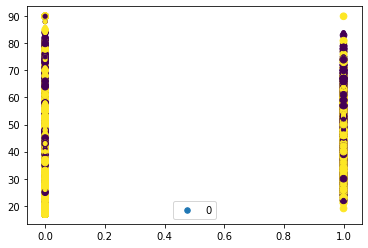

In [14]:
ax=plt.scatter(traindata.income,traindata['age'],s=(traindata['workclass'].value_counts())/500,c=traindata.workclass)
plt.legend(traindata.workclass)
plt.show()

#### in population older than 50 years workclass of a certain kind(0: non-private) tends to make >50k/year

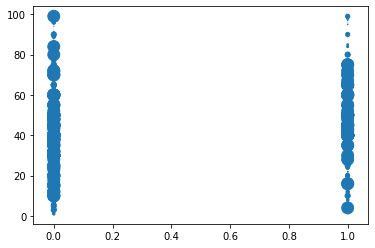

In [15]:
plt.scatter(traindata.income,traindata['hours-per-week'],s=(traindata['hours-per-week'].value_counts())/100)

#### longer hours don't necessarily mean income >50k/year